## Uninformed opinion dynamics


Franci, A., & Nov, O. C. (n.d.). A Realization Theory for Bio-inspired Collective Decision-Making. Retrieved from https://arxiv.org/pdf/1503.08526v3.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
import pylab

Network dynamics simulated for each kind:

$\dot{x_i} = -d_{ii} x_i + u\sum_{j=1,j \neq i}^N a_{ij} tanh(x_j) \\
d_{ii} = \sum_{j=1}^n a_{ij} \\
u = 1$

In matrix representation:

$\dot{\mathbf{x}} = -D\mathbf{x} + u A S(\mathbf{x}); S(\mathbf{x}) = tanh(\mathbf{x})$

### Complete network

$d_{ii} = N-1$

In [2]:
g = nx.complete_graph(10, create_using=nx.DiGraph())

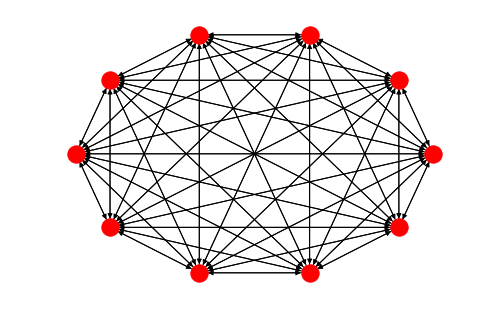

In [3]:
nx.draw_circular(g)
plt.show()

In [4]:
#color_map = []
for i, n in g.nodes(data = True):
    n['decision'] = np.random.rand(1)[0]

In [5]:
g.nodes(data = True)

NodeDataView({0: {'decision': 0.8083981741784698}, 1: {'decision': 0.5050636865906871}, 2: {'decision': 0.4697856392346963}, 3: {'decision': 0.5323108996535139}, 4: {'decision': 0.19051840848607426}, 5: {'decision': 0.27471453335585594}, 6: {'decision': 0.6713169012116085}, 7: {'decision': 0.5845593956174682}, 8: {'decision': 0.8754537493333686}, 9: {'decision': 0.9733205292179039}})

In [6]:
[n['decision'] for i, n in g.nodes(data = True)]

[0.8083981741784698,
 0.5050636865906871,
 0.4697856392346963,
 0.5323108996535139,
 0.19051840848607426,
 0.27471453335585594,
 0.6713169012116085,
 0.5845593956174682,
 0.8754537493333686,
 0.9733205292179039]

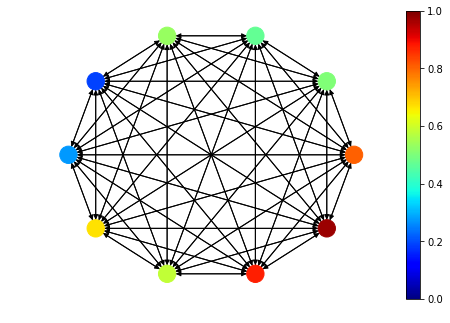

In [7]:
nx.draw_circular(g, cmap=plt.get_cmap('jet'), vmin=0, vmax=1, node_color = [n['decision'] for i, n in g.nodes(data = True)])
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=Normalize(vmin=0, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

In [8]:
dt = 0.01
u = 1
N = nx.number_of_nodes(g)

plt.colorbar(sm)

for iter in np.arange(100):
    for i, n in g.nodes(data = True):
        t1 = -(N-1)*n['decision']
        t2 = u*(np.sum(np.tanh([nbr_n['decision'] for nbr_i, nbr_n in g.nodes(data = True)])) - np.tanh(n['decision']))
        n['updated_decision'] = (t1 + t2)*dt + n['decision']
    print([n['updated_decision'] for i,n in g.nodes(data = True)])
    nx.draw_circular(g, cmap=plt.get_cmap('jet'), vmin=0, vmax=1, node_color = [n['updated_decision'] for i, n in g.nodes(data = True)])
    plt.savefig("images/complete/iter"+str(iter).zfill(2)+".png")
    for i, n in g.nodes(data = True):
        n['decision'] = n['updated_decision']

[0.7797785936622246, 0.5057703651062535, 0.4739479825343952, 0.5303547747860541, 0.22231260061933367, 0.2981334747756148, 0.6558632372114559, 0.5775126479100046, 0.8404448791644669, 0.9290433949836497]
[0.7537450703278084, 0.5062569471161621, 0.4775511734065739, 0.5284386688558144, 0.25078960131823946, 0.3190777726129566, 0.6417518537365673, 0.5710003035475903, 0.8086167399193126, 0.8888003597525105]
[0.7300243750215087, 0.5065137251751746, 0.4806189049297842, 0.5265274616726187, 0.27625206962416393, 0.3377641850561973, 0.6288234149877284, 0.5649394809400157, 0.7796431085201664, 0.8521904603469664]
[0.7083740504575887, 0.5065379175542711, 0.4831784839549928, 0.5245954399937379, 0.2989777276618907, 0.354393281279575, 0.6169395643101532, 0.5592612682357918, 0.7532328824403954, 0.8188538698690635]
[0.6885789118314544, 0.5063321599185848, 0.48525965323330744, 0.5226245486956763, 0.31922105223803915, 0.3691503145976215, 0.6059801559115586, 0.5539085511231342, 0.7291262743825008, 0.788467654

In [9]:
[n['updated_decision'] for i,n in g.nodes(data = True)]

[0.3404651054754456,
 0.34045535170472996,
 0.3404542334305488,
 0.34045621762790185,
 0.3404454866656925,
 0.3404481052412751,
 0.3404606662481171,
 0.34045788360381685,
 0.3404672961831513,
 0.34047051610991613]

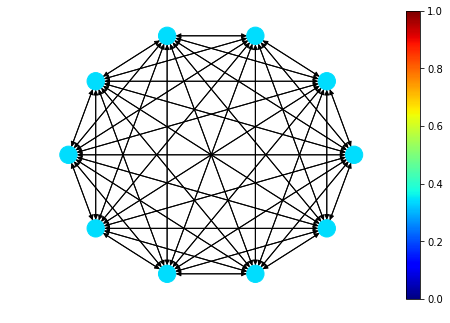

In [13]:
nx.draw_circular(g, cmap=plt.get_cmap('jet'), vmin=0, vmax=1, node_color = [n['updated_decision'] for i, n in g.nodes(data = True)])
plt.colorbar(sm)
plt.show()

In [14]:
!convert -delay 5 images/complete/* images/network_complete.gif

In [15]:
from IPython.display import Image
Image(url='./images/network_complete.gif')

In [16]:
nx.adjacency_matrix(g)

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 90 stored elements in Compressed Sparse Row format>

### Scale-free network

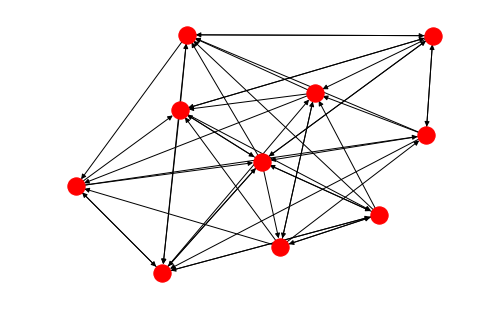

In [19]:
er = nx.erdos_renyi_graph(directed=True, n=10, p=np.random.rand(1)[0])

nx.draw(er)
plt.show()

In [20]:
for i, n in er.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0] - 1

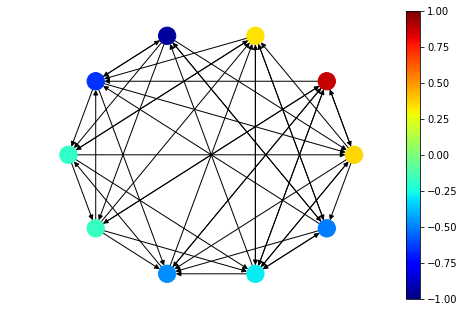

In [21]:
nx.draw_circular(er, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in er.nodes(data = True)])
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=Normalize(vmin=-1, vmax=1))
sm._A = []
plt.colorbar(sm)
plt.show()

In [22]:
er.nodes(data=True)

NodeDataView({0: {'decision': 0.36573806586576607}, 1: {'decision': 0.8805700689410638}, 2: {'decision': 0.33880600293012075}, 3: {'decision': -0.9494915713072367}, 4: {'decision': -0.6509189207691366}, 5: {'decision': -0.18394582489873712}, 6: {'decision': -0.1692020838051349}, 7: {'decision': -0.4758075594755562}, 8: {'decision': -0.28838771057124535}, 9: {'decision': -0.5007858811701817}})

In [23]:
A = nx.adjacency_matrix(er)

In [24]:
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(er), axis=1)).reshape(-1))

In [25]:
N_er = nx.number_of_nodes(er)
u = 1
dt = 0.01

plt.colorbar(sm)
for iter in np.arange(100):
    x = [n['decision'] for i, n in er.nodes(data=True)]
    dxdt = -D.dot(x) + u*A.dot(np.tanh(x))
    x_new = x + dxdt*dt
    for i, n in er.nodes(data = True):
        n['decision'] = x_new[i]
    nx.draw_circular(er, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in er.nodes(data = True)])    
    plt.savefig("images/scale_free/iter"+str(iter).zfill(3)+".png")
    print([n['decision'] for i,n in er.nodes(data = True)])

[0.3459196715267704, 0.82540990941894, 0.3102780399674133, -0.9123596878772522, -0.6350228955851931, -0.17430385767047438, -0.16336900331393808, -0.4530211630528897, -0.2737023826725231, -0.49283618663229384]
[0.32693152108394896, 0.7733181545133868, 0.2832909972718928, -0.8769387492280681, -0.6194864799570543, -0.16528725851322712, -0.15794308598295867, -0.4313691898141432, -0.26019685080823285, -0.4849395755786377]
[0.308721621023419, 0.7241262793741344, 0.25776696571493934, -0.8431482248514957, -0.6043008679756239, -0.1568699001888288, -0.15291505135187072, -0.4108180674214293, -0.24779478210164863, -0.4770990880676793]
[0.2912428938375355, 0.6776742140193008, 0.2336316816010882, -0.8109115786294805, -0.5894584538819665, -0.14902609870668101, -0.14827380027740847, -0.3913328379315066, -0.2364232883310643, -0.4693179519817728]
[0.2744528056137081, 0.6338100277681176, 0.21081440210360297, -0.7801560492607126, -0.5749526729609281, -0.14173066679769553, -0.14400663321501728, -0.37287740

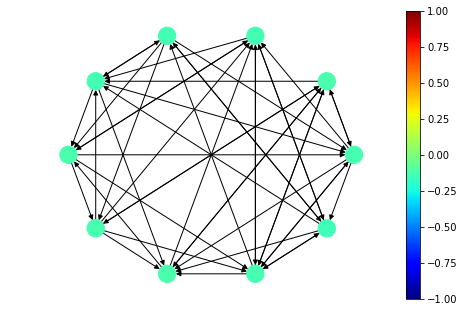

In [27]:
nx.draw_circular(er, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in er.nodes(data = True)])
plt.colorbar(sm)
plt.show()

In [28]:
!convert -delay 5 -loop 0 images/scale_free/* images/network_scale_free.gif

In [29]:
from IPython.display import Image
Image(url='./images/network_scale_free.gif')

### Connected network

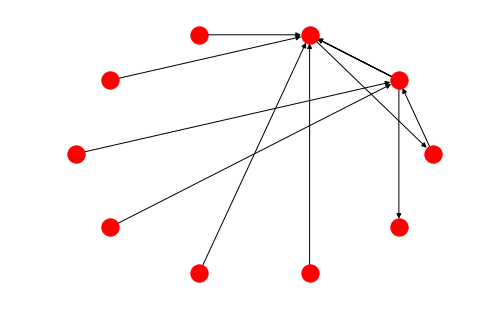

In [2]:
gc = nx.scale_free_graph(10)
nx.draw_circular(gc)
plt.show()

In [3]:
while not nx.is_strongly_connected(gc):
    e1 = np.random.randint(10)
    e2 = np.random.randint(10)
    print(e1, e2)
    gc.add_edge(e1, e2)

nx.is_strongly_connected(gc)

5 9
4 1
2 1
1 3
5 2
2 9
2 2
3 1
7 2
7 3
9 5
9 8
6 6
2 9
1 4
0 4
6 0
1 3
7 8
8 9
5 1
2 9
4 3
1 4
0 2
8 0
8 8
2 1
7 9
6 5
8 5
7 4
2 2
0 9
5 0
2 2
2 9
1 5
7 2
5 3
5 7
6 6
9 4
4 2
1 6


True

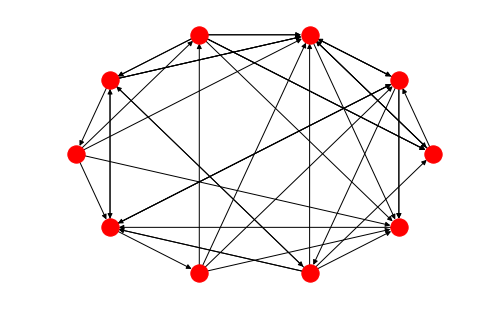

In [37]:
nx.draw_circular(gc)
plt.show()

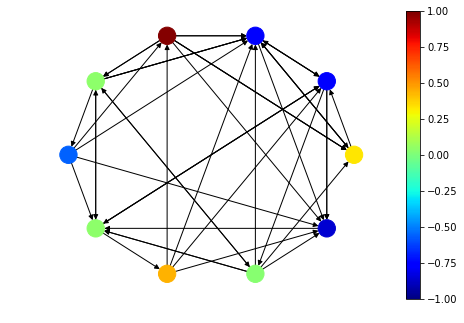

In [40]:
for i, n in gc.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0] - 1

nx.draw_circular(gc, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in gc.nodes(data = True)])
plt.colorbar(sm)
plt.show()

In [5]:
A = nx.adjacency_matrix(gc)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(gc), axis=1)).reshape(-1))

In [6]:
-D+A

matrix([[ -4,   1,   1,   0,   1,   0,   0,   0,   0,   1],
        [  0, -11,   4,   2,   2,   1,   1,   0,   0,   1],
        [  1,   2,  -7,   0,   0,   0,   0,   0,   0,   4],
        [  0,   1,   1,  -2,   0,   0,   0,   0,   0,   0],
        [  0,   1,   2,   1,  -4,   0,   0,   0,   0,   0],
        [  1,   2,   1,   1,   0,  -7,   0,   1,   0,   1],
        [  1,   1,   0,   0,   0,   1,  -3,   0,   0,   0],
        [  0,   0,   3,   1,   1,   0,   0,  -7,   1,   1],
        [  1,   0,   1,   0,   0,   1,   0,   0,  -4,   1],
        [  0,   0,   0,   0,   1,   1,   0,   0,   1,  -3]])

In [42]:
N_gc = nx.number_of_nodes(gc)
u = 1
dt = 0.01

plt.colorbar(sm)
for iter in np.arange(100):
    x = [n['decision'] for i, n in gc.nodes(data=True)]
    dxdt = -D.dot(x) + u*A.dot(np.tanh(x))
    x_new = x + dxdt*dt
    for i, n in gc.nodes(data = True):
        n['decision'] = x_new[i]
    nx.draw_circular(gc, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in gc.nodes(data = True)])    
    plt.savefig("images/strongly_connected/iter"+str(iter).zfill(3)+".png")
    print([n['decision'] for i,n in gc.nodes(data = True)])

[0.30040616951042887, -0.7291147052372902, -0.7533734312953929, 0.9277946542710415, 0.051179284485146775, -0.5369548558622648, 0.03080796631129644, 0.4123414346704062, 0.024315386254277926, -0.8049867297269608]
[0.27026859632114725, -0.6847751030738329, -0.7340589901309653, 0.8735661444395117, 0.058342391233032996, -0.5183803025828945, 0.02132980377662594, 0.382467590960411, 0.01770857544843927, -0.7591542827482018]
[0.24197336073186929, -0.6432760195556047, -0.7151070754757659, 0.8221523381896341, 0.06456325326083392, -0.5008714332608079, 0.012470056131683168, 0.3540275009944217, 0.01135775006620305, -0.7160118619172001]
[0.2154334075004067, -0.6044562020154485, -0.6965168338718608, 0.7734153893751506, 0.06988811035474103, -0.48436341480142275, 0.004194333859346571, 0.3269686998845017, 0.005257411773847104, -0.675429831507336]
[0.1905632006809983, -0.5681615730415561, -0.678288557265834, 0.7272232053536851, 0.07436394004865574, -0.4687942709328717, -0.003530771074374814, 0.30123867449

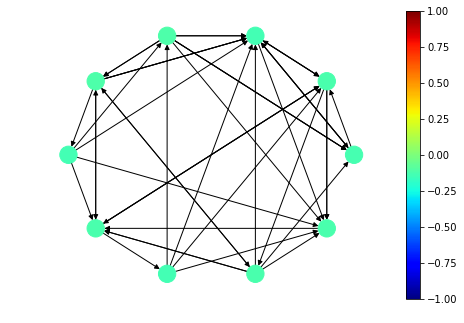

In [44]:
nx.draw_circular(gc, cmap=plt.get_cmap('jet'), vmin=-1, vmax=1, node_color = [n['decision'] for i, n in gc.nodes(data = True)])
plt.colorbar(sm)
plt.show()

In [45]:
!convert -delay 5 -loop 0 images/strongly_connected/* images/network_strongly_connected.gif

In [1]:
from IPython.display import Image
Image(url='../images/network_strongly_connected.gif')